In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo
ruta_carpeta_actual = os.getcwd()
ruta_carpeta_raiz = os.path.dirname(ruta_carpeta_actual)
csv_path  = os.path.join(ruta_carpeta_raiz, "dataset", "PuntosMuestra_CR_2023.csv")
df = pd.read_csv(csv_path)

# Mostrar las primeras filas
print("Primeras filas del archivo:")
display(df.head())



Primeras filas del archivo:


,CATEGORIA,lon,lat,year,B2,B3,B4,B8,B11,NDVI,EVI2,GCVI,MNDWI,NDMI,SR,R35,R54
0,1,-85.306759,10.580492,2023,0.048270,0.079620,0.093150,0.305010,0.288977,0.550606,0.343948,2.543588,-0.551372,-0.000857,3.450438,0.316602,0.998287
1,1,-85.211628,10.526593,2023,0.042660,0.075687,0.071796,0.326323,0.273247,0.608104,0.382768,3.109668,-0.568329,0.083792,4.200990,0.293619,1.182928
2,1,-85.476810,10.330132,2023,0.041203,0.084570,0.070270,0.309493,0.237580,0.570262,0.318837,2.650761,-0.473874,0.091006,3.653994,0.322602,1.200234
3,1,-85.476810,10.373520,2023,0.037380,0.071796,0.067245,0.267390,0.194034,0.583140,0.335017,2.723419,-0.470783,0.126112,3.815948,0.346257,1.289934
4,1,-85.477080,10.395080,2023,0.060095,0.096147,0.105497,0.333665,0.243520,0.471253,0.340190,2.285315,-0.467742,0.062778,2.782527,0.383170,1.133965


In [2]:
# Mostrar información general del DataFrame
print("\nInformación del dataset:")
print(df.info())

# Opcional: Ver estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29201 entries, 0 to 29200
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CATEGORIA  29201 non-null  int64  
 1   lon        29201 non-null  float64
 2   lat        29201 non-null  float64
 3   year       29201 non-null  int64  
 4   B2         29201 non-null  float64
 5   B3         29201 non-null  float64
 6   B4         29201 non-null  float64
 7   B8         29201 non-null  float64
 8   B11        29201 non-null  float64
 9   NDVI       29201 non-null  float64
 10  EVI2       29201 non-null  float64
 11  GCVI       29201 non-null  float64
 12  MNDWI      29201 non-null  float64
 13  NDMI       29201 non-null  float64
 14  SR         29201 non-null  float64
 15  R35        29201 non-null  float64
 16  R54        29201 non-null  float64
dtypes: float64(15), int64(2)
memory usage: 3.8 MB
None

Estadísticas descriptivas:
          CATEGORIA  

In [3]:
# Leer el archivo
df = df.drop(columns=['lon', 'lat', 'year'])
# Calcular matriz de correlación
corr_matrix = df.corr()

# Mostrar las primeras correlaciones con la variable objetivo
corr_target = corr_matrix['CATEGORIA'].sort_values(ascending=False)
print("Correlación con respecto a CATEGORIA:")
print(corr_target)


Correlación con respecto a CATEGORIA:
CATEGORIA    1.000000
SR           0.539441
GCVI         0.530167
EVI2         0.351172
NDVI         0.344485
NDMI         0.334530
R54          0.271982
B8           0.149714
R35          0.004936
MNDWI       -0.054776
B11         -0.190517
B2          -0.357748
B4          -0.399148
B3          -0.457697
Name: CATEGORIA, dtype: float64


Correlación con respecto a CATEGORIA:
SR       0.539441
GCVI     0.530167
EVI2     0.351172
NDVI     0.344485
NDMI     0.334530
R54      0.271982
B8       0.149714
R35      0.004936
MNDWI   -0.054776
B11     -0.190517
B2      -0.357748
B4      -0.399148
B3      -0.457697
Name: CATEGORIA, dtype: float64


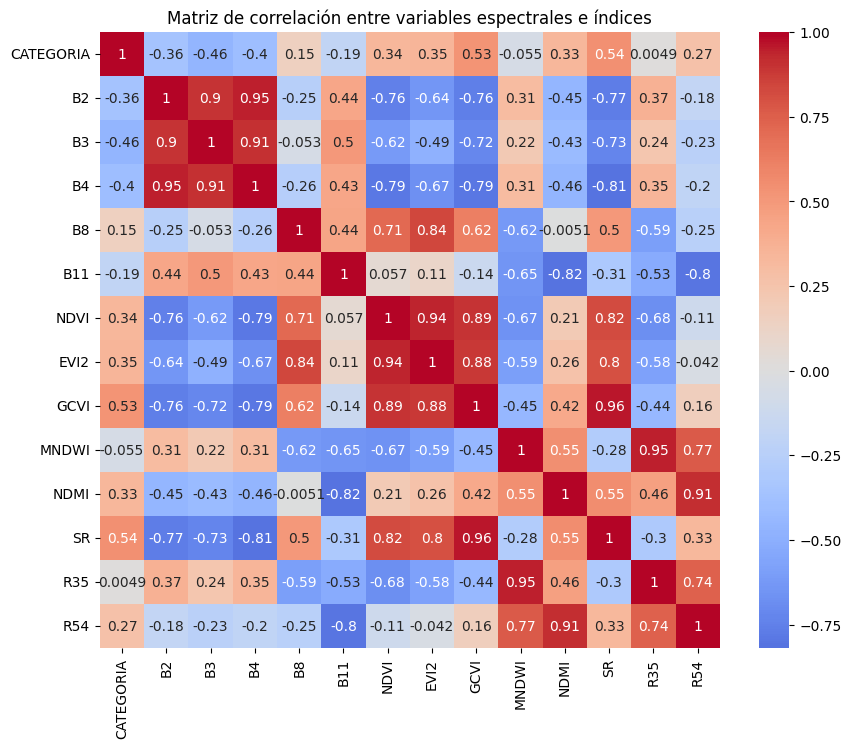

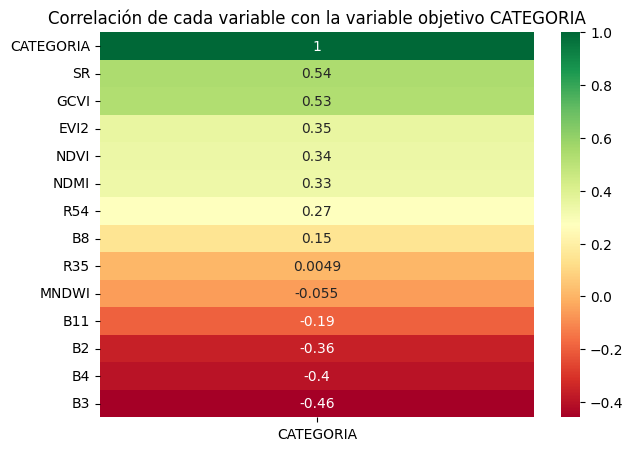

C:\Users\Fran\AppData\Local\Temp\ipykernel_41580\1697350014.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target.values, y=corr_target.index, palette='viridis')


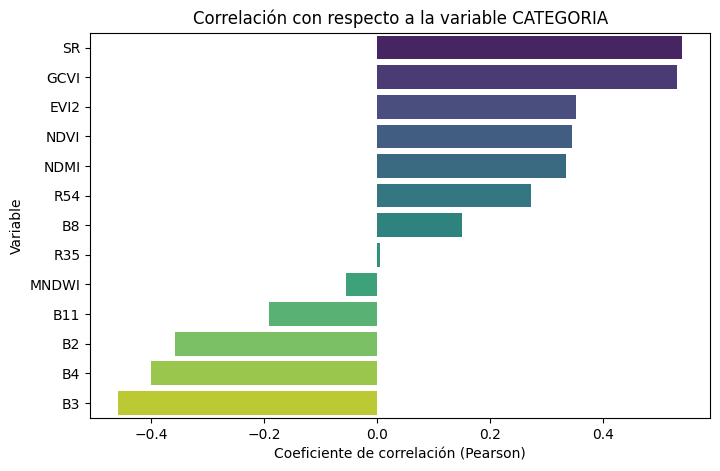

C:\Users\Fran\AppData\Local\Temp\ipykernel_41580\1697350014.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='magma')


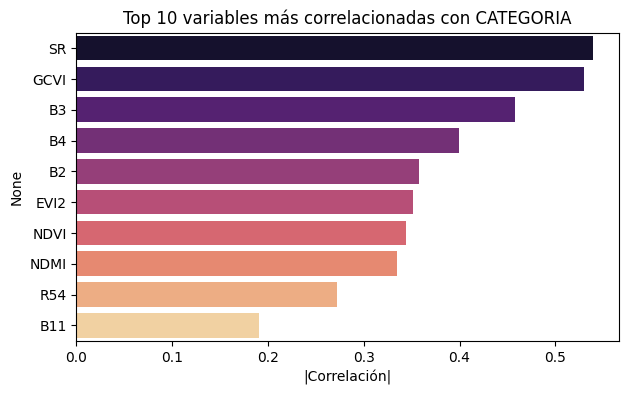

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 4️⃣ Mostrar correlaciones con respecto a la variable objetivo
corr_target = corr_matrix['CATEGORIA'].drop('CATEGORIA').sort_values(ascending=False)
print("Correlación con respecto a CATEGORIA:")
print(corr_target)

# 5️⃣ Heatmap completo
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True)
plt.title('Matriz de correlación entre variables espectrales e índices')
plt.show()

# 6️⃣ Heatmap de correlación con la variable objetivo
plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix[['CATEGORIA']].sort_values(by='CATEGORIA', ascending=False),
            cmap='RdYlGn', annot=True)
plt.title('Correlación de cada variable con la variable objetivo CATEGORIA')
plt.show()

# 7️⃣ Gráfico de barras: correlación con la variable objetivo
plt.figure(figsize=(8,5))
sns.barplot(x=corr_target.values, y=corr_target.index, palette='viridis')
plt.title('Correlación con respecto a la variable CATEGORIA')
plt.xlabel('Coeficiente de correlación (Pearson)')
plt.ylabel('Variable')
plt.show()

# 8️⃣ Top 10 variables más correlacionadas (en valor absoluto)
top_corr = corr_target.abs().sort_values(ascending=False).head(10)
plt.figure(figsize=(7,4))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='magma')
plt.title('Top 10 variables más correlacionadas con CATEGORIA')
plt.xlabel('|Correlación|')
plt.show()


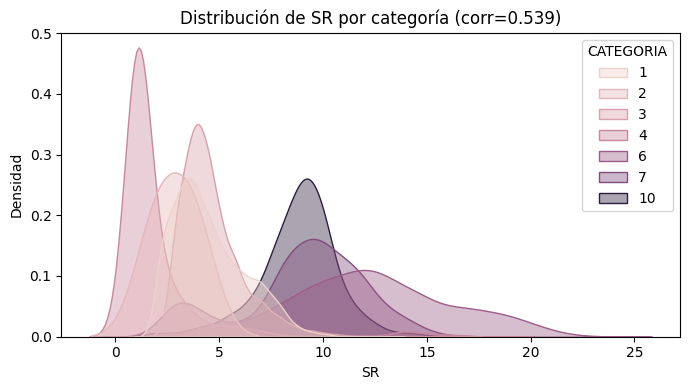

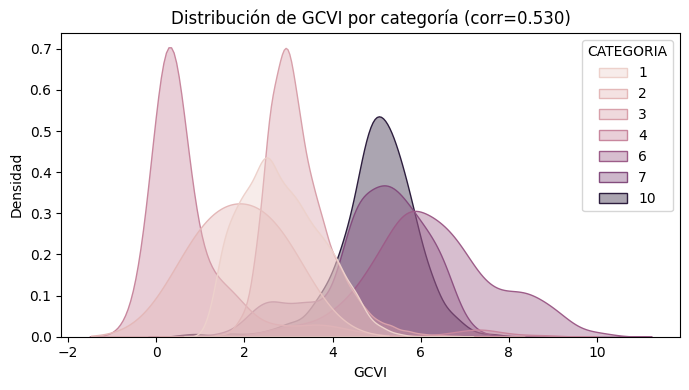

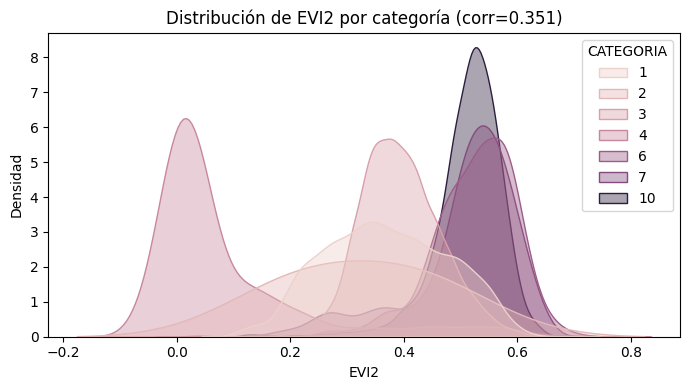

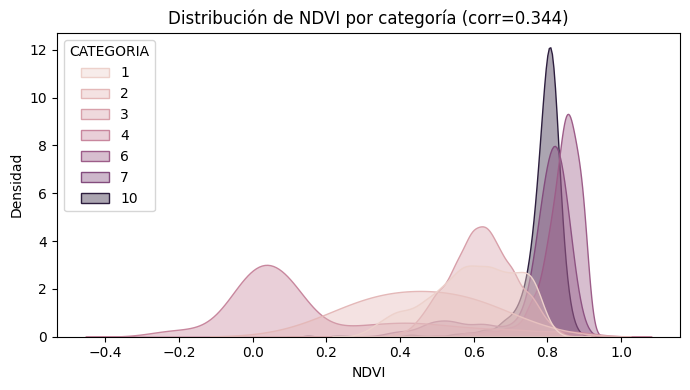

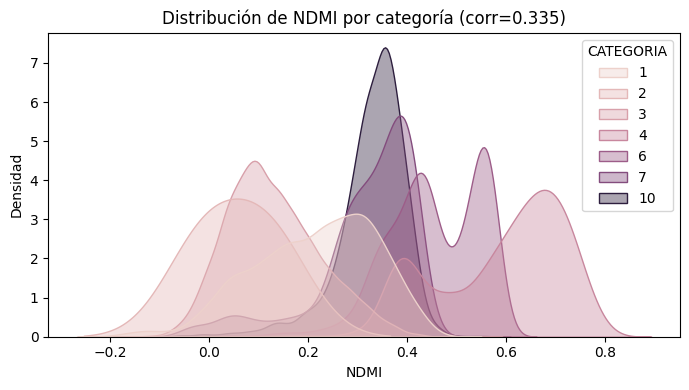

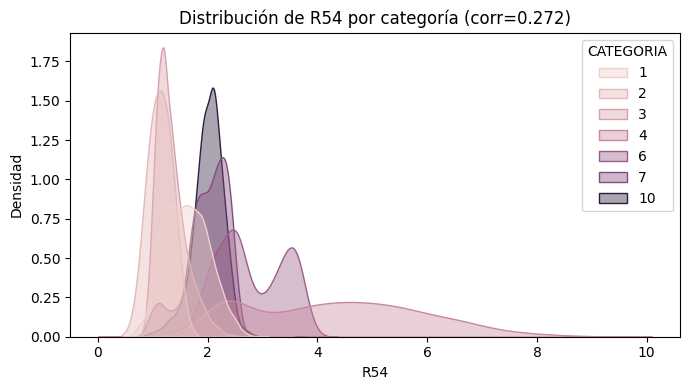

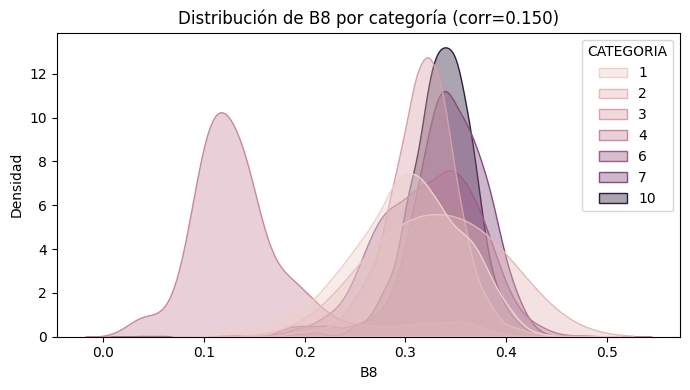

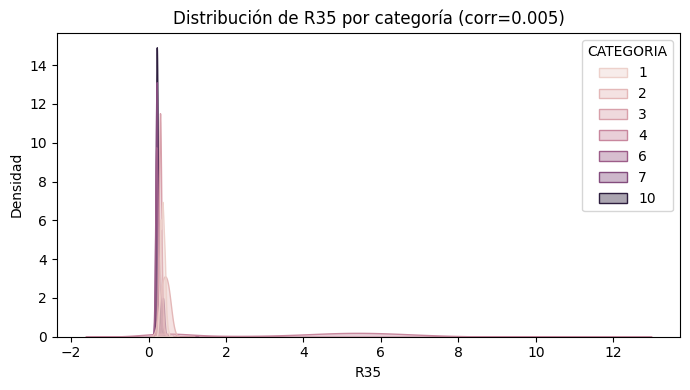

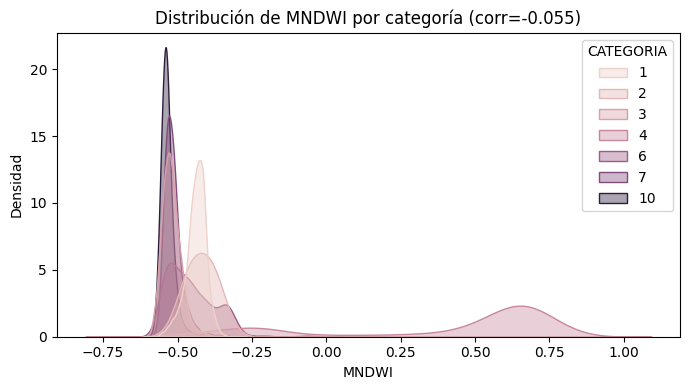

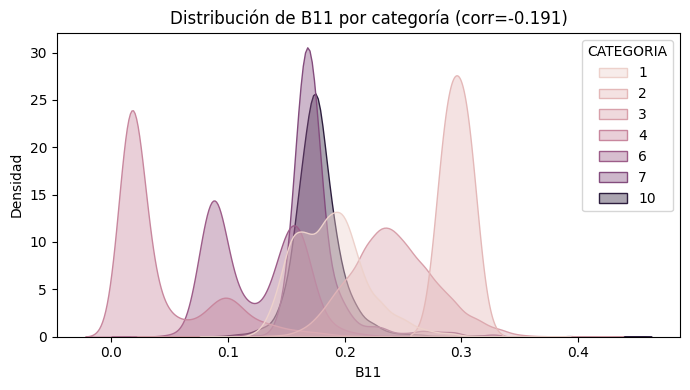

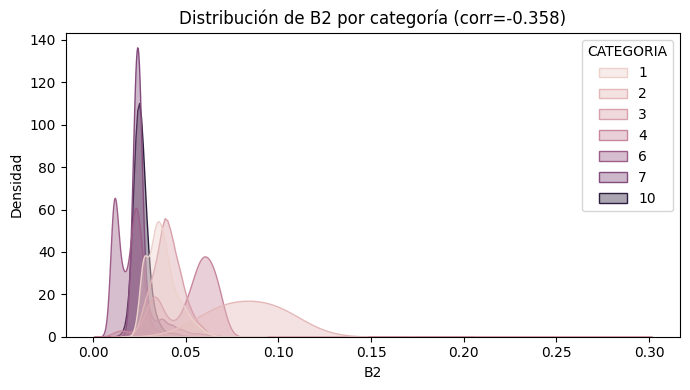

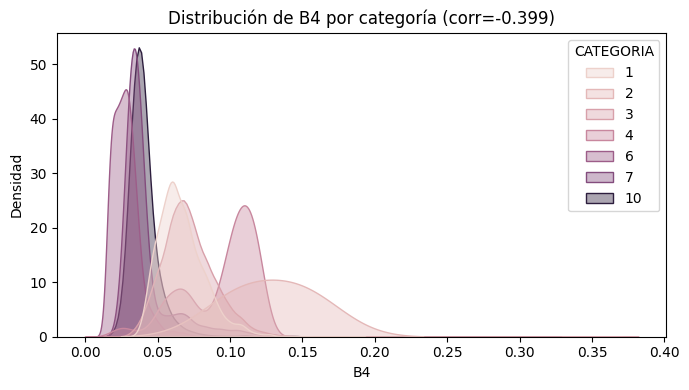

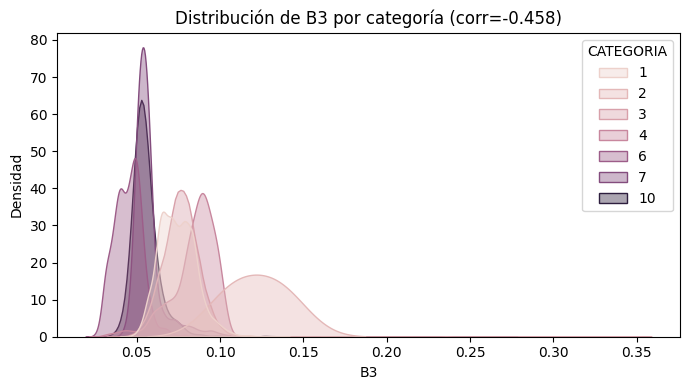

In [6]:
import matplotlib.pyplot as plt

# 3️⃣ Calcular correlaciones con respecto a CATEGORIA
corr_target = df.corr()['CATEGORIA'].drop('CATEGORIA').sort_values(ascending=False)

# 4️⃣ Ordenar las variables por correlación
ordered_vars = corr_target.index.tolist()

# 5️⃣ (Opcional) Crear carpeta para guardar imágenes
#os.makedirs('/content/densidades', exist_ok=True)

# 6️⃣ Generar gráficos de densidad en orden de correlación
for col in ordered_vars:
    plt.figure(figsize=(7,4))
    sns.kdeplot(data=df, x=col, hue='CATEGORIA', fill=True, common_norm=False, alpha=0.4)
    plt.title(f'Distribución de {col} por categoría (corr={corr_target[col]:.3f})')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.tight_layout()

    # Guardar cada gráfico en carpeta
    #plt.savefig(f'/content/densidades/{ordered_vars.index(col)+1:02d}_{col}.png')
    plt.show()


In [7]:
from sklearn.model_selection import train_test_split

# 3️⃣ Separar variables predictoras (X) y variable objetivo (y)
X = df.drop(columns=['CATEGORIA'])
y = df['CATEGORIA']

Cantidad de muestras por categoría:
CATEGORIA
1      8197
2         2
3     15227
4      1118
6      1181
7      1373
10     2103
Name: count, dtype: int64


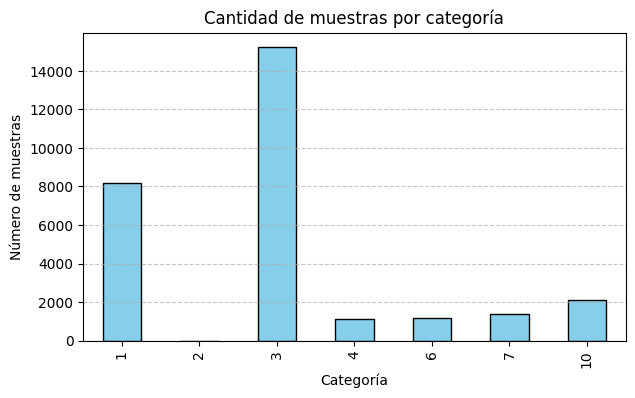

In [8]:
# Mostrar cantidad de muestras por categoría
conteo = df['CATEGORIA'].value_counts().sort_index()

print("Cantidad de muestras por categoría:")
print(conteo)

# (Opcional) gráfico de barras
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
conteo.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cantidad de muestras por categoría')
plt.xlabel('Categoría')
plt.ylabel('Número de muestras')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [9]:
# Eliminar categoría 2
df = df[df['CATEGORIA'] != 2]

# Crear mapeo automático (ordenado)
clases_ordenadas = sorted(df['CATEGORIA'].unique())
mapa = {old: new for new, old in enumerate(clases_ordenadas)}

# Aplicar el mapeo
df['CATEGORIA'] = df['CATEGORIA'].map(mapa)

# Mostrar resultado
print("Nuevo mapeo de clases:")
print(mapa)

print("\nCantidad de muestras por nueva clase:")
print(df['CATEGORIA'].value_counts().sort_index())


Nuevo mapeo de clases:
{1: 0, 3: 1, 4: 2, 6: 3, 7: 4, 10: 5}

Cantidad de muestras por nueva clase:
CATEGORIA
0     8197
1    15227
2     1118
3     1181
4     1373
5     2103
Name: count, dtype: int64


C:\Users\Fran\AppData\Local\Temp\ipykernel_41580\1765134385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CATEGORIA'] = df['CATEGORIA'].map(mapa)


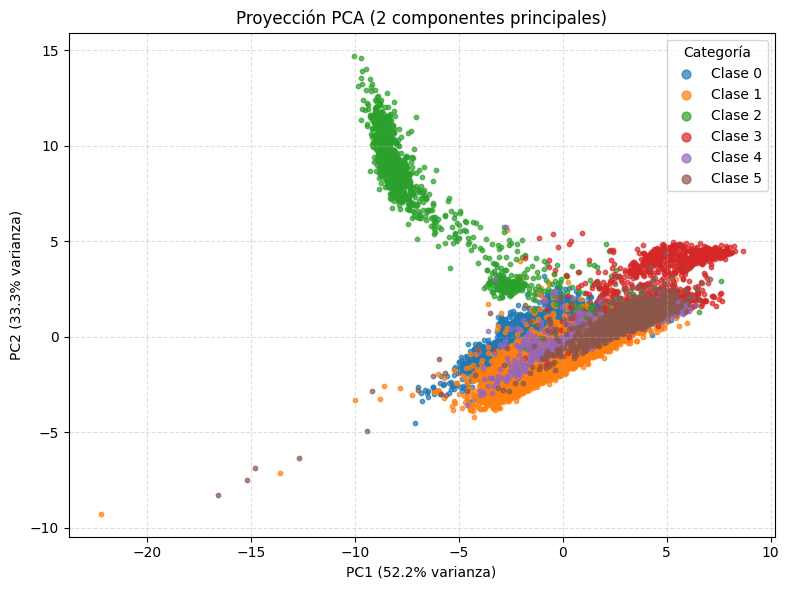

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 4️⃣ Separar variables
X = df.drop(columns=['CATEGORIA'])
y = df['CATEGORIA']

# 5️⃣ Escalar variables (importante para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6️⃣ PCA (2 componentes)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 7️⃣ Crear DataFrame con resultados
df_pca = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'CATEGORIA': y
})

# 8️⃣ Paleta de 6 colores (distintos y legibles)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c',
          '#d62728', '#9467bd', '#8c564b']  # azul, naranja, verde, rojo, violeta, marrón

# 9️⃣ Gráfico PCA
plt.figure(figsize=(8,6))
for clase in sorted(df_pca['CATEGORIA'].unique()):
    subset = df_pca[df_pca['CATEGORIA'] == clase]
    plt.scatter(subset['PC1'], subset['PC2'],
                color=colors[clase],
                label=f'Clase {clase}', s=10, alpha=0.7)

plt.title('Proyección PCA (2 componentes principales)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% varianza)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% varianza)')
plt.legend(title='Categoría', markerscale=2)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [11]:
# 4️⃣ Dividir en entrenamiento (70%) y prueba (30%) con semilla 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# 5️⃣ Mostrar resultados
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (20439, 13)
Tamaño de X_test: (8760, 13)
Tamaño de y_train: (20439,)
Tamaño de y_test: (8760,)
